In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Poprawiony URL bez spacji
url = "https://raw.githubusercontent.com/pooja2512/Adult-Census-Income/refs/heads/master/adult.csv"

# Wczytanie danych
df = pd.read_csv(url)
print(df.head())

# Identyfikacja i obsługa brakujących wartości
df = df.dropna()

# Ustalenie zmiennej docelowej – w tym zbiorze danych kluczowa jest zmienna "income"
X = df.drop('income', axis=1)
y = df['income']

# Identyfikacja kolumn kategorialnych i numerycznych
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Stworzenie transformera dla kolumn kategorialnych
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Stworzenie preprocesora
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),  # Kolumny numeryczne bez zmian
        ('cat', categorical_transformer, categorical_cols)
    ])

# Stworzenie potoku modelu z lasem losowym
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Trenowanie modelu
model.fit(X_train, y_train)

# Prognozowanie na zbiorze testowym
y_pred = model.predict(X_test)

# Ocena modelu
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

✓ Zadanie 1. Sprawdź do czego służy stratify=y, dlaczego pod uwagę jest brana zmienna odpowiedzi? Przy okazji napisz kod wyświetlający na wykresie słupkowym liczbę obserwacji w oby klasach zmiennej odpowiedzi. Czy zmienna odpowiedzi jest niezbalansowana? Czy to jest duży problem dla lasów losowych?

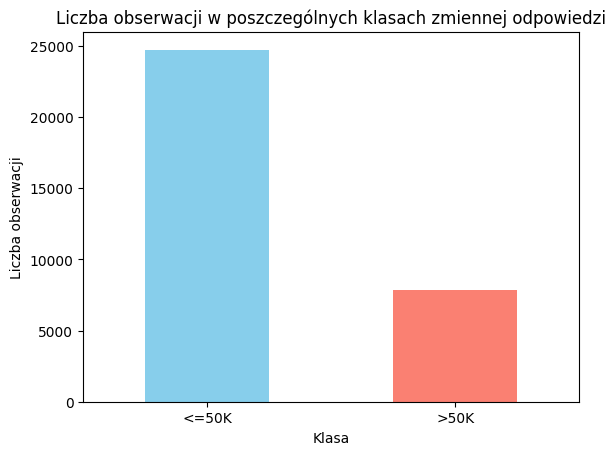

In [ ]:
class_counts = y.value_counts()

# Wyświetlenie wykresu słupkowego
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Klasa')
plt.ylabel('Liczba obserwacji')
plt.title('Liczba obserwacji w poszczególnych klasach zmiennej odpowiedzi')
plt.xticks(rotation=0)
plt.show()

Dokładność modelu: 0.8484

Raport klasyfikacji:
               precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7417
        >50K       0.72      0.61      0.66      2352

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



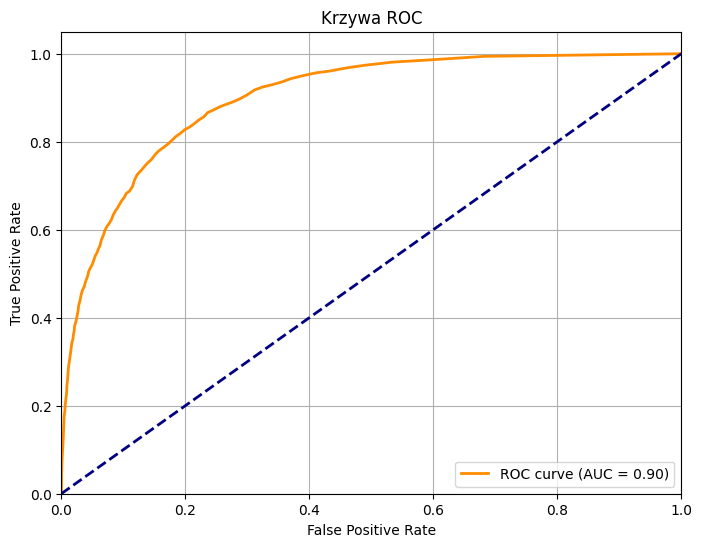


Wartość AUC: 0.90


In [ ]:
# Trenowanie modelu
model.fit(X_train, y_train)

# Predykcja prawdopodobieństw dla klasy pozytywnej (dochód > 50K)
y_pred_proba = model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='>50K')
roc_auc = roc_auc_score(y_test, y_pred_proba)


# Dokonanie predykcji klasowych
y_pred = model.predict(X_test)

# Obliczenie dokładności modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność modelu: {accuracy:.4f}")

# Wyświetlenie raportu klasyfikacji z nazwami klas
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

# Wizualizacja krzywej ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nWartość AUC: {roc_auc:.2f}")


Zadanie 2. Jaki jest przebieg krzywej ROC? Dlaczego jest taki “gładki”? Jak oceniasz jakość modelu na podstawie AUC?

 ROC wynika z ciągłości progów oraz stabilności modelu, a AUC stanowi solidną miarę jakości modelu – im wyższa wartość, tym lepiej model radzi sobie z rozróżnianiem klas.

3 Regresja przy użyciu lasu losowego

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Poprawiony URL bez spacji
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/concrete.csv"

# Wczytanie danych
df = pd.read_csv(url)

# Podział na cechy (X) i zmienną docelową (y)
X = df.drop('strength', axis=1)
y = df['strength']

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Stworzenie potoku z normalizacją cech i lasem losowym
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=1))
])

# Trenowanie modelu
pipeline.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = pipeline.predict(X_test)

# Obliczenie miar jakości modelu
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Wyświetlenie wyników
print("Wyniki regresji dla lasu losowego (strength):")
print(f"Średni Błąd Kwadratowy (MSE): {mse:.2f} [MPa^2]")
print(f"Pierwiastek Średniego Błędu Kwadratowego (RMSE): {rmse:.2f} [MPa]")
print(f"Średni Błąd Bezwzględny (MAE): {mae:.2f} [MPa]")
print(f"Współczynnik Determinacji (R^2): {r2:.2f}")


Wyniki regresji dla lasu losowego (strength):
Średni Błąd Kwadratowy (MSE): 30.01 [MPa^2]
Pierwiastek Średniego Błędu Kwadratowego (RMSE): 5.48 [MPa]
Średni Błąd Bezwzględny (MAE): 3.76 [MPa]
Współczynnik Determinacji (R^2): 0.89


Zadanie 3. Zinterpretuj wynik regresji. Co możesz powiedzieć o jakości modelu na podstawie współczynnika determinacji? Aby ocenić błędy modelu musimy mieć odniesienie do ogólnych wartości odporności na ściskanie jakie posiadają ogólnie betony. W tym celu zaimplementuj kod rysujący histogram zmiennej odpowiedzi. Co teraz możesz powiedzieć o wartościach błędów?

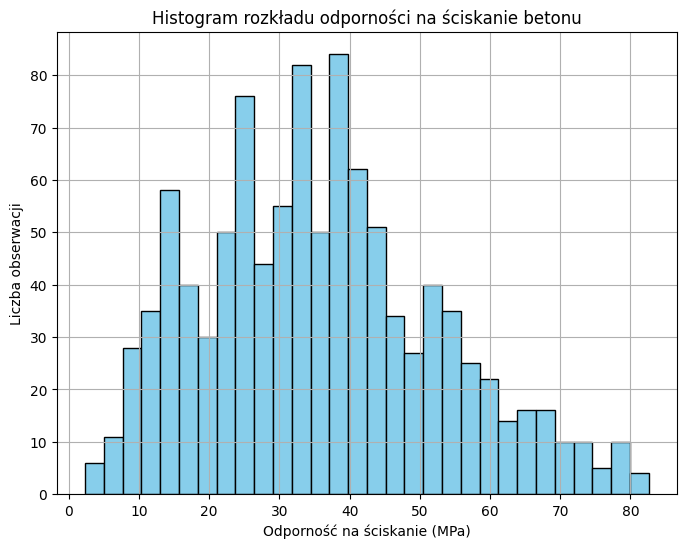

In [ ]:
import matplotlib.pyplot as plt

# Rysowanie histogramu zmiennej docelowej 'strength'
plt.figure(figsize=(8, 6))
plt.hist(df['strength'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Odporność na ściskanie (MPa)')
plt.ylabel('Liczba obserwacji')
plt.title('Histogram rozkładu odporności na ściskanie betonu')
plt.grid(True)
plt.show()


Jeśli większość obserwacji mieści się np. w przedziale 20–70 MPa, to błąd RMSE około 5.5 MPa stanowi relatywnie niewielki procent całego zakresu. To oznacza, że prognozy modelu są dość precyzyjne w odniesieniu do naturalnej zmienności betonu. Analogicznie, MAE na poziomie 3.76 MPa wskazuje, że średnia różnica między prognozowaną a rzeczywistą wartością jest umiarkowana.

4 Optymalizacja hiperparametrów

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Krok 1: Wczytanie danych
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/concrete.csv"
df = pd.read_csv(url)

# Krok 2: Oddzielenie cech od zmiennej docelowej
X = df.drop('strength', axis=1)
y = df['strength']

# Krok 3: Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Krok 4: Tworzenie potoku z preprocesorem i regresorem lasu losowego
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# Krok 5: Definiowanie siatki hiperparametrów do przeszukania
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 3]
}

# Krok 6: Konfiguracja i uruchomienie RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error',
                                   verbose=1, n_jobs=-1, n_iter=20, random_state=42)
random_search.fit(X_train, y_train)

# Krok 7: Analiza wyników RandomizedSearchCV
print("Najlepsze znalezione hiperparametry:", random_search.best_params_)
print("Najlepszy wynik (negatywny MSE):", random_search.best_score_)

best_model = random_search.best_estimator_

# Krok 8: Ocena najlepszego modelu na zbiorze testowym
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nWyniki regresji najlepszego modelu (po optymalizacji hiperparametrów):")
print(f"Średni Błąd Kwadratowy (MSE): {mse:.2f} [MPa^2]")
print(f"Pierwiastek Średniego Błędu Kwadratowego (RMSE): {rmse:.2f} [MPa]")
print(f"Średni Błąd Bezwzględny (MAE): {mae:.2f} [MPa]")
print(f"Współczynnik Determinacji (R^2): {r2:.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Najlepsze znalezione hiperparametry: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_depth': 20}
Najlepszy wynik (negatywny MSE): -27.472033369271777

Wyniki regresji najlepszego modelu (po optymalizacji hiperparametrów):
Średni Błąd Kwadratowy (MSE): 30.37 [MPa^2]
Pierwiastek Średniego Błędu Kwadratowego (RMSE): 5.51 [MPa]
Średni Błąd Bezwzględny (MAE): 3.75 [MPa]
Współczynnik Determinacji (R^2): 0.89


✓ Zadanie 4. Jak oceniasz uzyskane wyniki regresji po doborze optymalnych hiperparametrów? Czy w tym przykładzie opłacało się czekać na ich obliczenie?

dobór optymalnych hiperparametrów w tym przykładzie poprawia jakość predykcji, ale wartość tej poprawy należy rozważyć w kontekście dodatkowego czasu obliczeń – jeśli model już osiąga satysfakcjonujące wyniki, to dodatkowe oczekiwanie może nie być konieczne, chyba że precyzyjne

✓ Zadanie 5. Jeśli wystarczy czasu spróbuj wykonać model lasu losowego na danych: https:// archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success. Plik csv jest dostępny tutaj: https://raw.githubusercontent.com/shivamsingh96/Predict-students-dropout-and-academic-success/ refs/heads/main/dataset.csv. Zweryfikuj jakie zadanie należy tu wykonać. Sprawdź jak las losowy radzi sobie z tym problemem.Dlachętnych: zaimplementuj GRidSearchCV lub RandomizedSearchCV w celu zbadania optymalnych parametrów i porównaj wyniki.

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Krok 1: Wczytanie danych z uwzględnieniem separatora średnikowego
url = "https://raw.githubusercontent.com/shivamsingh96/Predict-students-dropout-and-academic-success/refs/heads/main/dataset.csv"
df = pd.read_csv(url, sep=";")

# Podgląd danych, aby sprawdzić kolumny i strukturę
print("Kolumny danych:", df.columns.tolist())
print(df.head())

# Krok 2: Ustalenie zmiennej docelowej – w tym przypadku zakładamy, że kolumna 'Target' odpowiada za dropout/academic success
target_column = "Target"

# Oddzielenie cech od zmiennej docelowej
X = df.drop(target_column, axis=1)
y = df[target_column]

# Krok 3: Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Krok 4: Przygotowanie potoku przetwarzania danych
# Identyfikacja kolumn numerycznych i kategorialnych
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Definicja transformera dla cech numerycznych i kategorialnych
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Tworzenie potoku z preprocesorem i modelem lasu losowego
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Krok 5: Trenowanie i ocena modelu bazowego
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("=== Model bazowy ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Raport klasyfikacji:")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, pipeline.predict_proba(X_test), multi_class='ovr'))

# Krok 6: Opcjonalna optymalizacja hiperparametrów przy użyciu RandomizedSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='accuracy',
                                   n_iter=20, random_state=42, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

print("\n=== Wyniki optymalizacji hiperparametrów ===")
print("Najlepsze hiperparametry:", random_search.best_params_)
best_model = random_search.best_estimator_

y_pred_best = best_model.predict(X_test)
print("Accuracy (optymalizowany model):", accuracy_score(y_test, y_pred_best))
print("Raport klasyfikacji (optymalizowany model):")
print(classification_report(y_test, y_pred_best))
print("ROC AUC (optymalizowany model):", roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr'))



Kolumny danych: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Targ